# GetARMSondes

Purpose: In this module you will download radiosondes made at Atmospheric Radiation Measurement (ARM) field stations. 

Skills learned: <br> 

Computer skills: Linux/Unix general commands. 
NSF Polar data: Ordering and downloading data from the ARM archive.

Steps:

A) Order the data from ARM.

B) Download the data onto a computer.



## A. Order AWARE data from ARM:

1) Go to the AWARE data website at: http://www.arm.gov/sites/amf/awr, and read about the AMF deployment at McMurdo.

2) On the right, under Deployment Operations, click on Baseline Instruments and Data Plots.

3) Scroll down.  Near the bottom you will see SONDE, then Balloon-Borne Sounding System. Click on Browse Data.

4) Check out how the data is organized: Date at the top, green means good data, orange means data questionable, etc. 

5) Click the box at the top left of the upper set of data to get all the AWARE data from McMurdo.

6) Click the Cart button in the upper right.

7) Click the brown button in the upper right with an arrow pointing down.

8) You will be prompted to create a user account. Fill out the form to create it.

9) Then you will click one more button to confirm and then another ("OK").

10) The data should be made available from an ftp site in 48 hours. You will receive an email with directions.

## B. Put the McMurdo data on the T7500

To put the data on the T7500, you can use XQuartz or the standard Terminal:

1) Open Terminal - or - open XQuartz and under Applications select "Terminal" 

2) (Note: When you should type something, I'll write a dollar sign and a space before what you should type.  Those are meant to mimic what you see at the prompt.  Don't type them, just type what comes after).  Type:

&nbsp; &nbsp; &nbsp; &nbsp; $ ssh chemistry@ha329-T7500.pugetsound.edu

3) If it asks if "Are you sure ..." type 

&nbsp; &nbsp; &nbsp; &nbsp; $ yes

4) Enter the password.

5) You should be in the home directory. Create a folder for the McMurdo radiosonde data:

&nbsp; &nbsp; &nbsp; &nbsp;\$ mkdir McMurdo <br>
&nbsp; &nbsp; &nbsp; &nbsp;\$ cd McMurdo <br>
&nbsp; &nbsp; &nbsp; &nbsp;\$ mkdir radiosondes <br>
&nbsp; &nbsp; &nbsp; &nbsp;\$ cd radiosondes 

6) Now you're all set to put the ARM data into the radiosondes folder.  Directions are in the email you got from ARM.  You use the file transfer protocol (ftp) command:

&nbsp; &nbsp; &nbsp; &nbsp; $ ftp ftp.archive.arm.gov

7) After that you enter ftp for the username and then your email address for the password.

8) Now you have to cd into the directory they created for you.  It's given in the email too.

&nbsp; &nbsp; &nbsp; &nbsp; $ cd myUserFile/myUserDataFile

9) You can get all the data at the same time with the following. It will take a while:

&nbsp; &nbsp; &nbsp; &nbsp; $ mget -i *

10) Finally, when it finishes, log off by typing

&nbsp; &nbsp; &nbsp; &nbsp; $ quit


##D. Look at the data

Let's look at some radiosonde data!  We'll need some tools

In [1]:
# .. The files are netcdf files. We need the netcdf module for reading them in.
#    We also need a module for plotting
import scipy.io.netcdf as netcdf
import matplotlib.pyplot as plt 

In [3]:
# .. Specify the directory where we put the radiosondes 
#    and the name of one of the files.
sondesdirectory = "/home/chemistry/McMurdo/Radiosondes/"
sondesfile_winter = "awrsondewnpnM1.b1.20160730.104500.custom.cdf"

In [4]:
# .. Note that the filenames included the data: 20160730 means 2016/07/30. 
#    July is winter in Antarctica, so we'll load this in to a variable
#    called winter, using the netcdf module.
winter = netcdf.netcdf_file(sondesdirectory+sondesfile_winter)


In [5]:
# .. winter contains variables.  What are they?
winter.variables

{'alt': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f88d0>,
 'base_time': <scipy.io.netcdf.netcdf_variable at 0x7f728b5eced0>,
 'deg': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8810>,
 'dp': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8710>,
 'lat': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8990>,
 'lon': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8a50>,
 'pres': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8290>,
 'rh': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8650>,
 'tdry': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8350>,
 'time': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f80d0>,
 'time_offset': <scipy.io.netcdf.netcdf_variable at 0x7f728b5ecf90>,
 'u_wind': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8450>,
 'v_wind': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f8550>,
 'wspd': <scipy.io.netcdf.netcdf_variable at 0x7f728b5f81d0>}

In [32]:
# .. So the variables are listed above in single quotes. Let's check out
#    the first one, 'alt,' which is the altitude. First, we get it and
#    put it into a new variable we will call altitude. 
altitude = winter.variables['alt']

In [ ]:
# .. You can see what's in it by typing "altitude." and then hitting the tab key. Do that now
#    by putting your cursor after the period below and hitting tab. A window appears with a list
#    of attributes for altitude. Select "long_name" and 
#    shift-enter to see a more descriptive name for the variable. 
altitude.

In [31]:
# .. Repeat but this time select "units"
altitude.units

'm'

In [36]:
# .. Do it one more time but select "data" to see the altitude data themselves.
altitude.data

array([    37.5       ,     39.59999847,     43.29999924, ...,
        13588.59960938,  13595.20019531,  13601.59960938], dtype=float32)

In [38]:
# .. 'tdry' is the temperature. We will assign it to a variable called "temperature"
temperature = winter.variables['tdry']


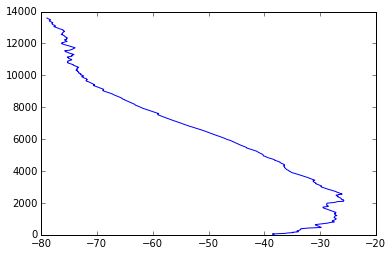

In [39]:
# .. We can plot the temperature as a funciton of altitude. Note that we put altitude on 
#    the y-axis so we can imagine going up in the atmosphere
plt.plot(temperature.data,altitude.data)

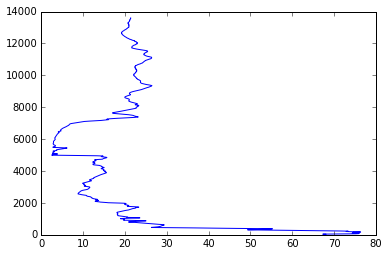

In [41]:
# .. Your turn. 'RH' is the relative humidity. Assign it to a variable called "relativehumidity".
#    Then plot it with altitude.
relativehumidity = winter.variables['rh']
plt.plot(relativehumidity.data,altitude.data)

label plot, make more plots. change winter/sumer, how does temp change with season....


In [33]:
sondesdirectory = "/home/chemistry/McMurdo/Radiosondes/"
sondesfile_fall = "awrsondewnpnM1.b1.20160315.101700.custom.cdf"